In [1]:
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
# import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error, mean_absolute_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model



In [2]:
data = pd.read_csv(r'data\Housing_clean.csv')

In [3]:
df = data.copy()

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          545 non-null    int64  
 1   bathrooms         545 non-null    int64  
 2   stories           545 non-null    int64  
 3   mainroad          545 non-null    int64  
 4   guestroom         545 non-null    int64  
 5   basement          545 non-null    int64  
 6   hotwaterheating   545 non-null    int64  
 7   airconditioning   545 non-null    int64  
 8   parking           545 non-null    int64  
 9   prefarea          545 non-null    int64  
 10  furnishingstatus  545 non-null    int64  
 11  area              545 non-null    float64
 12  price             545 non-null    float64
dtypes: float64(2), int64(11)
memory usage: 55.5 KB


,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275,8.466537,15.306987
std,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373,0.398283,0.372165
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.408531,14.375126
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.188689,15.048071
50%,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.433812,15.283385
75%,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,8.757784,15.562970
max,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,9.692767,16.403275


In [5]:
df.head(3)

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area,price
0,4,2,3,1,0,0,0,1,2,1,2,8.911934,16.403275
1,4,4,4,1,0,0,0,1,3,0,2,9.100526,16.321036
2,3,2,2,1,0,1,0,0,2,1,1,9.206332,16.321036


### Trainig

In [6]:
x = df.drop(['price'], axis=1) #Features
y = df['price'] #target

In [7]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [8]:
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(criterion='poisson',random_state = 0, max_depth=5)

# Fitting the Decision Tree Regression model to the data
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5, random_state=0)

### Optimizar Hiperparametros

In [10]:
# Max_depth optimizer
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2, 5, 6, 7, 8, 20]}   # Values to try 

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

#find the best value for 'max_depth'
best_max_depth = grid_search.best_params_['max_depth']
print(" max_depth best value is:", best_max_depth)

 max_depth best value is: 5


### Calculatin the loss after training

In [9]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE: ", mae)


RMSE:  0.243

MAE:  0.17912526282356606


### Models' chart

#### Modelo de dispersion

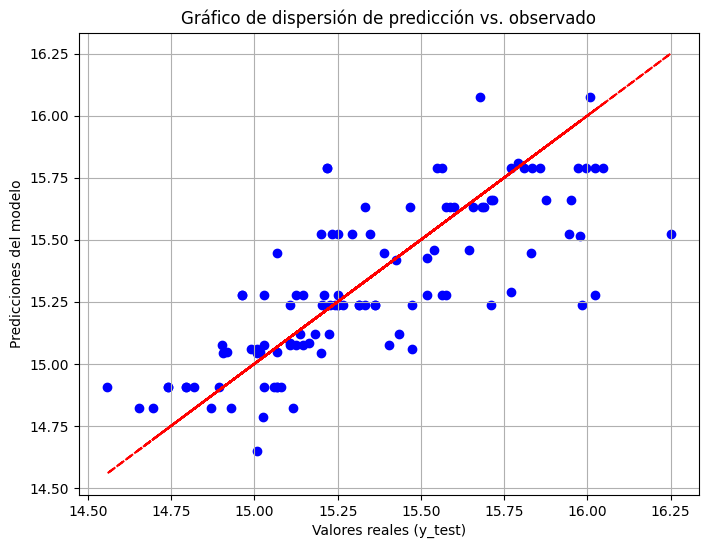

In [10]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Línea diagonal para referencia
plt.title('Gráfico de dispersión de predicción vs. observado')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones del modelo')
plt.grid(True)
plt.show()

#### Modelo de disper

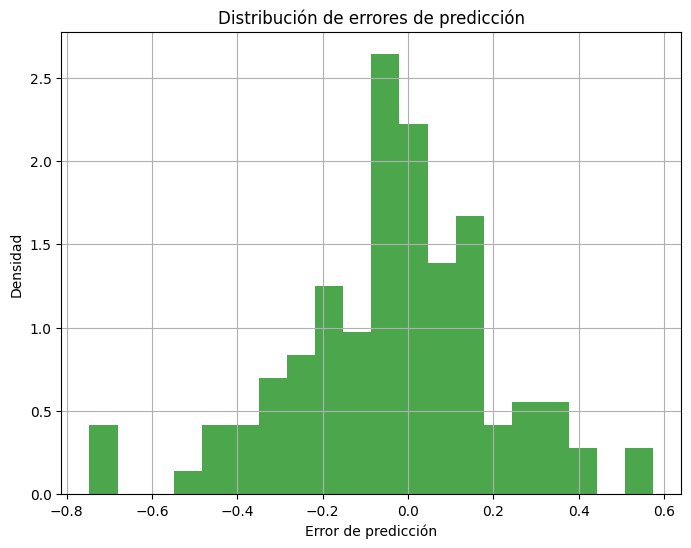

In [11]:
# Calcular errores
errors = y_pred - y_test

# Crear gráfico de densidad de distribución de errores
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, density=True, color='green', alpha=0.7)
plt.title('Distribución de errores de predicción')
plt.xlabel('Error de predicción')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

In [12]:
# Model saved
import joblib as jb

In [13]:
jb.dump(model, 'price_model.pkl')

['price_model.pkl']

In [14]:
#load model
jb.load('price_model.pkl')

DecisionTreeRegressor(criterion='poisson', max_depth=5, random_state=0)

#### Make a prediction

In [15]:
bedrooms =  1
bathrooms = 1
stories =   1
mainroad =  0
guestroom=  0
basement=   0
hotwaterheating= 0
airconditioning= 0
parking=    1
prefarea=   0
furnishingstatus=   0
area=   np.log(4753.029385188196)

In [16]:
v_list = [
    bedrooms,
    bathrooms,
    stories,
    mainroad,
    guestroom,
    basement,
    hotwaterheating,
    airconditioning,
    parking,
    prefarea,
    furnishingstatus,
    area
]

In [17]:
#Prediction
#W = np.array(v_list)
w_pred = model.predict([v_list])
inverse_log = np.exp(w_pred)
print(inverse_log)
print(f'The house value is:{inverse_log}')

[3426968.90575022]
The house value is:[3426968.90575022]


d:\0_Respaldo\0_Proyectos_2024\ML proyects\House price predictions\House_P_P\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
